In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# df= pd.read_csv('/Users/shalomifernandes/Desktop/UOB/TB2/DSMP/vdjdb.csv')
df = pd.read_csv('pre-processing final/vdjdb.csv')

In [3]:
df

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,...,antigen.species,reference.id,method,meta,cdr3fix,vdjdb.score,web.method,web.method.seq,web.cdr3fix.nc,web.cdr3fix.unmp
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CIVRAPGRADMRF"", ""cdr3_old"": ""CIVRAPG...",2,sort,sanger,no,no
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSYLPGQGDHYSNQPQHF"", ""cdr3_old"": ""...",2,sort,sanger,no,no
2,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSFEAGQGFFSNQPQHF"", ""cdr3_old"": ""C...",2,sort,sanger,no,no
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAVPSGAGSYQLTF"", ""cdr3_old"": ""CAVPSG...",2,sort,sanger,no,no
4,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSFEPGQGFYSNQPQHF"", ""cdr3_old"": ""C...",2,sort,sanger,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92766,30592,TRB,CASSPGQGGDNEQFF,TRBV7-3*01,TRBJ2-1*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,...,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSPGQGGDNEQFF"", ""cdr3_old"": ""CASSP...",0,sort,singlecell,no,no
92767,30593,TRA,CAPQGATNKLIF,TRAV12-2*01,TRAJ32*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,...,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAPQGATNKLIF"", ""cdr3_old"": ""CAPQGATN...",2,sort,singlecell,no,no
92768,30593,TRB,CASSLGAGGQETQYF,TRBV5-1*01,TRBJ2-5*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,...,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSLGAGGQETQYF"", ""cdr3_old"": ""CASSL...",2,sort,singlecell,no,no
92769,30594,TRA,CLVGGSGGYNKLIF,TRAV4*01,TRAJ4*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,...,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CLVGGSGGYNKLIF"", ""cdr3_old"": ""CLVGGS...",0,sort,singlecell,no,no


In [4]:
df.drop(['reference.id','method','meta','cdr3fix','web.method','web.method.seq','web.cdr3fix.nc','web.cdr3fix.unmp'], axis=1, inplace=True)

In [5]:
df.head()

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.gene,antigen.species,vdjdb.score
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2
2,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2
4,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2


In [6]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 complex.id            0
gene                  0
cdr3                  0
v.segm              101
j.segm             1145
species               0
mhc.a                 0
mhc.b                 0
mhc.class             0
antigen.epitope       0
antigen.gene         62
antigen.species       0
vdjdb.score           0
dtype: int64


In [7]:
# Drop rows with any missing values
df.dropna(subset=['v.segm','j.segm','antigen.gene'], inplace=True)

In [8]:
df.count()

complex.id         91550
gene               91550
cdr3               91550
v.segm             91550
j.segm             91550
species            91550
mhc.a              91550
mhc.b              91550
mhc.class          91550
antigen.epitope    91550
antigen.gene       91550
antigen.species    91550
vdjdb.score        91550
dtype: int64

In [9]:
# Check for missing values in each column
cleaned_data = df.isnull().sum()
cleaned_data

complex.id         0
gene               0
cdr3               0
v.segm             0
j.segm             0
species            0
mhc.a              0
mhc.b              0
mhc.class          0
antigen.epitope    0
antigen.gene       0
antigen.species    0
vdjdb.score        0
dtype: int64

In [10]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 4216


In [11]:
# Dropping all duplicate rows
df.drop_duplicates(inplace=True)

In [12]:
# Checking for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [13]:
# Calculate the counts for 'species', 'genes', and 'mhc.class'
species_counts = df['species'].value_counts()
genes_counts = df['gene'].value_counts()
mhc_class_counts = df['mhc.class'].value_counts()

species_counts, genes_counts, mhc_class_counts

(HomoSapiens      80909
 MusMusculus       5068
 MacacaMulatta     1357
 Name: species, dtype: int64,
 TRB    50949
 TRA    36385
 Name: gene, dtype: int64,
 MHCI     83254
 MHCII     4080
 Name: mhc.class, dtype: int64)

In [14]:
epitope_counts = df['antigen.epitope'].value_counts()

epitopes_to_keep = epitope_counts[epitope_counts >= 10].index
    
# Filter the DataFrame to only include rows with these epitopes
df = df[df['antigen.epitope'].isin(epitopes_to_keep)]

In [15]:
df

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.gene,antigen.species,vdjdb.score
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2
2,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2
4,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92766,30592,TRB,CASSPGQGGDNEQFF,TRBV7-3*01,TRBJ2-1*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,0
92767,30593,TRA,CAPQGATNKLIF,TRAV12-2*01,TRAJ32*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,2
92768,30593,TRB,CASSLGAGGQETQYF,TRBV5-1*01,TRBJ2-5*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,2
92769,30594,TRA,CLVGGSGGYNKLIF,TRAV4*01,TRAJ4*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,0


In [16]:
print(df.dtypes)

complex.id          int64
gene               object
cdr3               object
v.segm             object
j.segm             object
species            object
mhc.a              object
mhc.b              object
mhc.class          object
antigen.epitope    object
antigen.gene       object
antigen.species    object
vdjdb.score         int64
dtype: object


In [17]:
# Calculate the counts for 'species', 'genes', and 'mhc.class'
species_counts = df['species'].value_counts()
genes_counts = df['gene'].value_counts()
mhc_class_counts = df['mhc.class'].value_counts()

species_counts, genes_counts, mhc_class_counts

(HomoSapiens      78184
 MusMusculus       4942
 MacacaMulatta     1357
 Name: species, dtype: int64,
 TRB    49259
 TRA    35224
 Name: gene, dtype: int64,
 MHCI     80663
 MHCII     3820
 Name: mhc.class, dtype: int64)

count    84483.000000
mean        14.091734
std          1.878803
min          4.000000
25%         13.000000
50%         14.000000
75%         15.000000
max         38.000000
Name: cdr3_length, dtype: float64


D:\Program Files (x86)\python39\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


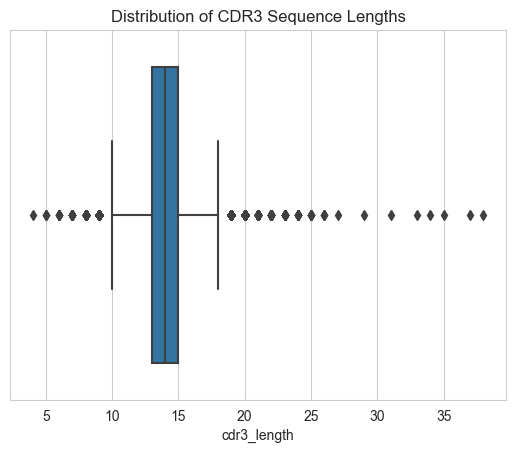

In [18]:
import pandas as pd

# Calculate the length of each sequence in the cdr3 column
df.loc[:,'cdr3_length'] = df['cdr3'].apply(len)

# Statistical summary to check for unusual lengths
print(df['cdr3_length'].describe())

# You can also use a box plot to visualize the distribution of sequence lengths
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['cdr3_length'])
plt.title('Distribution of CDR3 Sequence Lengths')
plt.show()

In [19]:
# Calculate the length of each CDR3 sequence
df.loc[:,'cdr3_length'] = df['cdr3'].apply(len)

# Count the occurrences of each sequence length
length_counts = df['cdr3_length'].value_counts()

# Sort the counts by sequence length
length_counts_sorted = length_counts.sort_index()

# Display the sorted counts
print(length_counts_sorted)

4         1
5         3
6         6
7        18
8       106
9       219
10     1240
11     4741
12     9264
13    17589
14    16637
15    17626
16     8833
17     5141
18     1860
19      762
20      263
21       94
22       39
23       15
24        9
25        6
26        3
27        1
29        1
31        1
33        1
34        1
35        1
37        1
38        1
Name: cdr3_length, dtype: int64


D:\Program Files (x86)\python39\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [20]:
df = df[(df['cdr3_length'] >= 10) & (df['cdr3_length'] <= 20)]
df

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.gene,antigen.species,vdjdb.score,cdr3_length
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,13
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,20
2,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,19
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,14
4,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92766,30592,TRB,CASSPGQGGDNEQFF,TRBV7-3*01,TRBJ2-1*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,0,15
92767,30593,TRA,CAPQGATNKLIF,TRAV12-2*01,TRAJ32*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,2,12
92768,30593,TRB,CASSLGAGGQETQYF,TRBV5-1*01,TRBJ2-5*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,2,15
92769,30594,TRA,CLVGGSGGYNKLIF,TRAV4*01,TRAJ4*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,0,14


In [21]:
# Count the number of unique species
unique_species_count = df['antigen.species'].nunique()
print("Number of distinct antigen species:", unique_species_count)

# Count the occurrences of each species
species_counts = df['antigen.species'].value_counts()
print("Counts for each antigen species:")
print(species_counts)

Number of distinct antigen species: 30
Counts for each antigen species:
CMV                  36853
InfluenzaA           14473
EBV                  10939
SARS-CoV-2            7736
HomoSapiens           3613
HIV-1                 2983
HCV                   2118
SIV                   1356
MCMV                  1338
YFV                    738
Wheat                  295
HTLV-1                 216
PlasmodiumBerghei      192
DENV1                  175
DENV3/4                168
HIV                    149
LCMV                   134
RSV                    121
HSV-2                  109
DENV2                   60
HCoV-HKU1               57
VSV                     29
HPV                     27
TriticumAestivum        23
M.tuberculosis          16
AdV                     12
GallusGallus            12
MCPyV                   10
synthetic                2
Homo sapiens             2
Name: antigen.species, dtype: int64


In [22]:
# Get a boolean series where each species with a count greater than 1000 is True
species_above_threshold = df['antigen.species'].value_counts() > 1000

# Convert it to a list of species
species_to_include = species_above_threshold[species_above_threshold].index.tolist()

# Filter the DataFrame
df = df[df['antigen.species'].isin(species_to_include)]
df

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.gene,antigen.species,vdjdb.score,cdr3_length
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,13
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,20
2,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,19
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,14
4,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92352,30540,TRB,CASSDRGTGLNGYTF,TRBV6-4*01,TRBJ1-2*01,HomoSapiens,HLA-DPA*01:03,HLA-DPB*04:01,MHCII,TFEYVSQPFLMDLE,Spike,SARS-CoV-2,0,15
92353,30541,TRA,CAGLNYGGSQGNLIF,TRAV35*01,TRAJ42*01,HomoSapiens,HLA-DPA*01:03,HLA-DPB*04:01,MHCII,TFEYVSQPFLMDLE,Spike,SARS-CoV-2,0,15
92354,30541,TRB,CASGPGGMTEAFF,TRBV5-5*01,TRBJ1-1*01,HomoSapiens,HLA-DPA*01:03,HLA-DPB*04:01,MHCII,TFEYVSQPFLMDLE,Spike,SARS-CoV-2,0,13
92355,0,TRA,CAGQNYGGSQGNLIF,TRAV35*01,TRAJ42*01,HomoSapiens,HLA-DPA*01:03,HLA-DPB*04:01,MHCII,TFEYVSQPFLMDLE,Spike,SARS-CoV-2,0,15


In [23]:
# Count the number of unique species
unique_gene_count = df['antigen.gene'].nunique()
print("Number of distinct antigen genes:", unique_gene_count)

# Count the occurrences of each species
genes_counts = df['antigen.gene'].value_counts()
print("Counts for each antigen genes:")
print(genes_counts)

Number of distinct antigen genes: 96
Counts for each antigen genes:
IE1          27619
M             9541
pp65          8723
EBNA4         4964
Spike         3916
             ...  
NY-ESO-4         2
NY-ESO-3         2
NY-ESO-2         2
synthetic        2
NY-ESO-5         2
Name: antigen.gene, Length: 96, dtype: int64


In [24]:
# Calculate the counts for each antigen.gene
gene_counts = df['antigen.gene'].value_counts()

# Find the antigen.gene values with counts of at least 100
genes_with_sufficient_count = gene_counts[gene_counts >= 100].index

# Filter the DataFrame to only include rows with these antigen.gene values
df = df[df['antigen.gene'].isin(genes_with_sufficient_count)]

df

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.gene,antigen.species,vdjdb.score,cdr3_length
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,13
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,20
2,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,19
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,14
4,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92352,30540,TRB,CASSDRGTGLNGYTF,TRBV6-4*01,TRBJ1-2*01,HomoSapiens,HLA-DPA*01:03,HLA-DPB*04:01,MHCII,TFEYVSQPFLMDLE,Spike,SARS-CoV-2,0,15
92353,30541,TRA,CAGLNYGGSQGNLIF,TRAV35*01,TRAJ42*01,HomoSapiens,HLA-DPA*01:03,HLA-DPB*04:01,MHCII,TFEYVSQPFLMDLE,Spike,SARS-CoV-2,0,15
92354,30541,TRB,CASGPGGMTEAFF,TRBV5-5*01,TRBJ1-1*01,HomoSapiens,HLA-DPA*01:03,HLA-DPB*04:01,MHCII,TFEYVSQPFLMDLE,Spike,SARS-CoV-2,0,13
92355,0,TRA,CAGQNYGGSQGNLIF,TRAV35*01,TRAJ42*01,HomoSapiens,HLA-DPA*01:03,HLA-DPB*04:01,MHCII,TFEYVSQPFLMDLE,Spike,SARS-CoV-2,0,15


In [25]:
df = df[df['complex.id'] != 0]
df

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.gene,antigen.species,vdjdb.score,cdr3_length
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,13
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,20
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,14
4,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,19
6,3,TRB,CASSYEPGQVSHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92349,30539,TRB,CASSWRQGGSIRESYTF,TRBV5-5*01,TRBJ1-2*01,HomoSapiens,HLA-DPA*01:03,HLA-DPB*04:01,MHCII,TFEYVSQPFLMDLE,Spike,SARS-CoV-2,0,17
92351,30540,TRA,CAALNYGGSQGNLIF,TRAV35*01,TRAJ42*01,HomoSapiens,HLA-DPA*01:03,HLA-DPB*04:01,MHCII,TFEYVSQPFLMDLE,Spike,SARS-CoV-2,0,15
92352,30540,TRB,CASSDRGTGLNGYTF,TRBV6-4*01,TRBJ1-2*01,HomoSapiens,HLA-DPA*01:03,HLA-DPB*04:01,MHCII,TFEYVSQPFLMDLE,Spike,SARS-CoV-2,0,15
92353,30541,TRA,CAGLNYGGSQGNLIF,TRAV35*01,TRAJ42*01,HomoSapiens,HLA-DPA*01:03,HLA-DPB*04:01,MHCII,TFEYVSQPFLMDLE,Spike,SARS-CoV-2,0,15


In [26]:
# Calculate the counts for 'species', 'genes', and 'mhc.class'
species_counts = df['species'].value_counts()
genes_counts = df['gene'].value_counts()
mhc_class_counts = df['mhc.class'].value_counts()

species_counts, genes_counts, mhc_class_counts

(HomoSapiens    51535
 MusMusculus     4173
 Name: species, dtype: int64,
 TRB    28195
 TRA    27513
 Name: gene, dtype: int64,
 MHCI     54719
 MHCII      989
 Name: mhc.class, dtype: int64)

Filtering the data by keeping rows that have data only on Humans as we want to do our further analysis only on Human Data

In [27]:
# Filter the DataFrame for human species
df = df[df['species'] == 'HomoSapiens']

# The resulting DataFrame 'df' now only contains rows with human species 
df

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.gene,antigen.species,vdjdb.score,cdr3_length
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,13
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,20
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,14
4,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,19
6,3,TRB,CASSYEPGQVSHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92349,30539,TRB,CASSWRQGGSIRESYTF,TRBV5-5*01,TRBJ1-2*01,HomoSapiens,HLA-DPA*01:03,HLA-DPB*04:01,MHCII,TFEYVSQPFLMDLE,Spike,SARS-CoV-2,0,17
92351,30540,TRA,CAALNYGGSQGNLIF,TRAV35*01,TRAJ42*01,HomoSapiens,HLA-DPA*01:03,HLA-DPB*04:01,MHCII,TFEYVSQPFLMDLE,Spike,SARS-CoV-2,0,15
92352,30540,TRB,CASSDRGTGLNGYTF,TRBV6-4*01,TRBJ1-2*01,HomoSapiens,HLA-DPA*01:03,HLA-DPB*04:01,MHCII,TFEYVSQPFLMDLE,Spike,SARS-CoV-2,0,15
92353,30541,TRA,CAGLNYGGSQGNLIF,TRAV35*01,TRAJ42*01,HomoSapiens,HLA-DPA*01:03,HLA-DPB*04:01,MHCII,TFEYVSQPFLMDLE,Spike,SARS-CoV-2,0,15


We can now drop columns like complex.id, species(since we are only taking human species), and cdr3_length

In [28]:
df.drop(['complex.id','species','cdr3_length'], axis=1, inplace=True)
df

D:\Program Files (x86)\python39\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,gene,cdr3,v.segm,j.segm,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.gene,antigen.species,vdjdb.score
0,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2
1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2
3,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2
4,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2
6,TRB,CASSYEPGQVSHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2
...,...,...,...,...,...,...,...,...,...,...,...
92349,TRB,CASSWRQGGSIRESYTF,TRBV5-5*01,TRBJ1-2*01,HLA-DPA*01:03,HLA-DPB*04:01,MHCII,TFEYVSQPFLMDLE,Spike,SARS-CoV-2,0
92351,TRA,CAALNYGGSQGNLIF,TRAV35*01,TRAJ42*01,HLA-DPA*01:03,HLA-DPB*04:01,MHCII,TFEYVSQPFLMDLE,Spike,SARS-CoV-2,0
92352,TRB,CASSDRGTGLNGYTF,TRBV6-4*01,TRBJ1-2*01,HLA-DPA*01:03,HLA-DPB*04:01,MHCII,TFEYVSQPFLMDLE,Spike,SARS-CoV-2,0
92353,TRA,CAGLNYGGSQGNLIF,TRAV35*01,TRAJ42*01,HLA-DPA*01:03,HLA-DPB*04:01,MHCII,TFEYVSQPFLMDLE,Spike,SARS-CoV-2,0


In [29]:
# Calculate the counts for 'mhc.a', and 'mhc.b'

mhc_a_counts = df['mhc.a'].value_counts()
mhc_b_counts = df['mhc.b'].value_counts()

mhc_a_counts,mhc_b_counts

(HLA-A*03:01         28549
 HLA-A*02:01          9464
 HLA-A*11:01          4898
 HLA-B*08:01          2518
 HLA-A*01:01          1586
 HLA-B*07:02          1289
 HLA-DPA*01:03         818
 HLA-A*24:02           450
 HLA-B*57:01           384
 HLA-A*02              282
 HLA-A*68:01           206
 HLA-B*15:01           192
 HLA-A*24:01           153
 HLA-B*40:01           137
 HLA-A*08:01           124
 HLA-DRA*01:01         121
 HLA-A*02:01:48         70
 HLA-B*35:01            48
 HLA-A*11               34
 HLA-B*51:01            34
 HLA-B*44:02            33
 HLA-DRB1*04:05         32
 HLA-B*08               25
 HLA-B*07               18
 HLA-B*35:08            12
 HLA-DRB1*11:01         10
 HLA-B*35:08:01          8
 HLA-B*08:01:29          8
 HLA-DRA*01:02:03        8
 HLA-B*27:05:31          4
 HLA-B*35:42:01          4
 HLA-B*42:01             2
 HLA-B*81:01             2
 HLA-B*07:02:48          2
 HLA-A*02:01:59          2
 HLA-A*02:01:110         2
 HLA-B*51:193            2
 

Now, we will split the dataframes into two. One for only Human alpha chains and the other one for only Human beta chains and do our further analysis on alpha and beta chains for humans separately

In [30]:
import pandas as pd

# Split the DataFrame into two parts: one for TRA genes and one for TRB genes
df_alpha = df[df['gene'] == 'TRA']  # Adjust the condition if necessary
df_beta = df[df['gene'] == 'TRB']   # Adjust the condition if necessary

# Now df_alpha contains only rows where the gene column is 'TRA'
# and df_beta contains only rows where the gene column is 'TRB'
# Display the first few rows to verify
print("Alpha Chains (TRA genes):")
print(df_alpha.head())

print("Beta Chains (TRB genes):")
print(df_beta.head())

Alpha Chains (TRA genes):
    gene             cdr3           v.segm     j.segm     mhc.a mhc.b  \
0    TRA    CIVRAPGRADMRF      TRAV26-1*01  TRAJ43*01  HLA-B*08   B2M   
3    TRA   CAVPSGAGSYQLTF        TRAV20*01  TRAJ28*01  HLA-B*08   B2M   
7    TRA    CAYRPPGTYKYIF  TRAV38-2/DV8*01  TRAJ40*01  HLA-B*08   B2M   
680  TRA    CAYTVLGNEKLTF      TRAV38-1*01  TRAJ48*01  HLA-A*02   B2M   
682  TRA  CAVAGYGGSQGNLIF      TRAV12-2*01  TRAJ42*01  HLA-A*02   B2M   

    mhc.class antigen.epitope antigen.gene antigen.species  vdjdb.score  
0        MHCI        FLKEKGGL          Nef           HIV-1            2  
3        MHCI        FLKEKGGL          Nef           HIV-1            2  
7        MHCI        FLKEKGGL          Nef           HIV-1            2  
680      MHCI      ELAGIGILTV        MLANA     HomoSapiens            0  
682      MHCI      ELAGIGILTV        MLANA     HomoSapiens            1  
Beta Chains (TRB genes):
    gene                  cdr3     v.segm      j.segm     mhc.a mh

In [31]:
df_alpha.drop(['gene'], axis=1, inplace=True)
df_beta.drop(['gene'], axis=1, inplace=True)

df_alpha.head(), df_beta.head()

D:\Program Files (x86)\python39\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(                cdr3           v.segm     j.segm     mhc.a mhc.b mhc.class  \
 0      CIVRAPGRADMRF      TRAV26-1*01  TRAJ43*01  HLA-B*08   B2M      MHCI   
 3     CAVPSGAGSYQLTF        TRAV20*01  TRAJ28*01  HLA-B*08   B2M      MHCI   
 7      CAYRPPGTYKYIF  TRAV38-2/DV8*01  TRAJ40*01  HLA-B*08   B2M      MHCI   
 680    CAYTVLGNEKLTF      TRAV38-1*01  TRAJ48*01  HLA-A*02   B2M      MHCI   
 682  CAVAGYGGSQGNLIF      TRAV12-2*01  TRAJ42*01  HLA-A*02   B2M      MHCI   
 
     antigen.epitope antigen.gene antigen.species  vdjdb.score  
 0          FLKEKGGL          Nef           HIV-1            2  
 3          FLKEKGGL          Nef           HIV-1            2  
 7          FLKEKGGL          Nef           HIV-1            2  
 680      ELAGIGILTV        MLANA     HomoSapiens            0  
 682      ELAGIGILTV        MLANA     HomoSapiens            1  ,
                      cdr3     v.segm      j.segm     mhc.a mhc.b mhc.class  \
 1    CASSYLPGQGDHYSNQPQHF  TRBV13*01  TRBJ1-5*01  HLA

In [32]:
df_alpha.drop(['vdjdb.score'], axis=1, inplace=True)
df_beta.drop(['vdjdb.score'], axis=1, inplace=True)
df_alpha.head(), df_beta.head()

D:\Program Files (x86)\python39\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(                cdr3           v.segm     j.segm     mhc.a mhc.b mhc.class  \
 0      CIVRAPGRADMRF      TRAV26-1*01  TRAJ43*01  HLA-B*08   B2M      MHCI   
 3     CAVPSGAGSYQLTF        TRAV20*01  TRAJ28*01  HLA-B*08   B2M      MHCI   
 7      CAYRPPGTYKYIF  TRAV38-2/DV8*01  TRAJ40*01  HLA-B*08   B2M      MHCI   
 680    CAYTVLGNEKLTF      TRAV38-1*01  TRAJ48*01  HLA-A*02   B2M      MHCI   
 682  CAVAGYGGSQGNLIF      TRAV12-2*01  TRAJ42*01  HLA-A*02   B2M      MHCI   
 
     antigen.epitope antigen.gene antigen.species  
 0          FLKEKGGL          Nef           HIV-1  
 3          FLKEKGGL          Nef           HIV-1  
 7          FLKEKGGL          Nef           HIV-1  
 680      ELAGIGILTV        MLANA     HomoSapiens  
 682      ELAGIGILTV        MLANA     HomoSapiens  ,
                      cdr3     v.segm      j.segm     mhc.a mhc.b mhc.class  \
 1    CASSYLPGQGDHYSNQPQHF  TRBV13*01  TRBJ1-5*01  HLA-B*08   B2M      MHCI   
 4     CASSFEPGQGFYSNQPQHF  TRBV13*01  TRBJ1-5*01  HL

In [33]:
import pandas as pd

# Rename the columns
df_alpha.rename(columns={'antigen.epitope': 'epitope', 'antigen.gene': 'gene', 'antigen.species': 'species'}, inplace=True)
df_beta.rename(columns={'antigen.epitope': 'epitope', 'antigen.gene': 'gene', 'antigen.species': 'species'}, inplace=True)

# Now the columns are renamed to 'epitope', 'gene', and 'species'
df_alpha.head(), df_beta.head()  # Display the first few rows to verify the changes

D:\Program Files (x86)\python39\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


(                cdr3           v.segm     j.segm     mhc.a mhc.b mhc.class  \
 0      CIVRAPGRADMRF      TRAV26-1*01  TRAJ43*01  HLA-B*08   B2M      MHCI   
 3     CAVPSGAGSYQLTF        TRAV20*01  TRAJ28*01  HLA-B*08   B2M      MHCI   
 7      CAYRPPGTYKYIF  TRAV38-2/DV8*01  TRAJ40*01  HLA-B*08   B2M      MHCI   
 680    CAYTVLGNEKLTF      TRAV38-1*01  TRAJ48*01  HLA-A*02   B2M      MHCI   
 682  CAVAGYGGSQGNLIF      TRAV12-2*01  TRAJ42*01  HLA-A*02   B2M      MHCI   
 
         epitope   gene      species  
 0      FLKEKGGL    Nef        HIV-1  
 3      FLKEKGGL    Nef        HIV-1  
 7      FLKEKGGL    Nef        HIV-1  
 680  ELAGIGILTV  MLANA  HomoSapiens  
 682  ELAGIGILTV  MLANA  HomoSapiens  ,
                      cdr3     v.segm      j.segm     mhc.a mhc.b mhc.class  \
 1    CASSYLPGQGDHYSNQPQHF  TRBV13*01  TRBJ1-5*01  HLA-B*08   B2M      MHCI   
 4     CASSFEPGQGFYSNQPQHF  TRBV13*01  TRBJ1-5*01  HLA-B*08   B2M      MHCI   
 6    CASSYEPGQVSHYSNQPQHF  TRBV13*01  TRBJ1-5*01  H

# MODEL BUILDING AND ANALYSIS ON ALPHA CHAINS:

# ENCODING:

LABEL ENCODING ON THE 'GENE' AND 'SPECIES' COLUMN

In [34]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform 'gene' column
# Note: It's important to fit a new instance of LabelEncoder for each distinct column.
df_alpha.loc[:,'gene_encoded'] = LabelEncoder().fit_transform(df_alpha['gene'])

# Fit and transform 'species' column
df_alpha.loc[:,'species_encoded'] = LabelEncoder().fit_transform(df_alpha['species'])

# Now df contains the new encoded columns: 'gene_encoded' and 'species_encoded'
df_alpha

D:\Program Files (x86)\python39\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,cdr3,v.segm,j.segm,mhc.a,mhc.b,mhc.class,epitope,gene,species,gene_encoded,species_encoded
0,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,17,3
3,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,17,3
7,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,17,3
680,CAYTVLGNEKLTF,TRAV38-1*01,TRAJ48*01,HLA-A*02,B2M,MHCI,ELAGIGILTV,MLANA,HomoSapiens,11,4
682,CAVAGYGGSQGNLIF,TRAV12-2*01,TRAJ42*01,HLA-A*02,B2M,MHCI,ELAGIGILTV,MLANA,HomoSapiens,11,4
...,...,...,...,...,...,...,...,...,...,...,...
92344,CAGQLYGGSQGNLIF,TRAV35*01,TRAJ42*01,HLA-DPA*01:03,HLA-DPB*04:01,MHCII,TFEYVSQPFLMDLE,Spike,SARS-CoV-2,24,6
92346,CAGLNYGGSQGNLIF,TRAV35*01,TRAJ42*01,HLA-DPA*01:03,HLA-DPB*04:01,MHCII,TFEYVSQPFLMDLE,Spike,SARS-CoV-2,24,6
92348,CAGLNYGGSQGNLIF,TRAV35*01,TRAJ42*01,HLA-DPA*01:03,HLA-DPB*04:01,MHCII,TFEYVSQPFLMDLE,Spike,SARS-CoV-2,24,6
92351,CAALNYGGSQGNLIF,TRAV35*01,TRAJ42*01,HLA-DPA*01:03,HLA-DPB*04:01,MHCII,TFEYVSQPFLMDLE,Spike,SARS-CoV-2,24,6


LABEL ENCODING ON THE 'mhc.a' AND 'mhc.b' COLUMN

In [35]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform 'gene' column
# Note: It's important to fit a new instance of LabelEncoder for each distinct column.
df_alpha.loc[:,'mhc.a_encoded'] = LabelEncoder().fit_transform(df_alpha['mhc.a'])

# Fit and transform 'species' column
df_alpha.loc[:,'mhc.b_encoded'] = LabelEncoder().fit_transform(df_alpha['mhc.b'])

# Now df contains the new encoded columns: 'gene_encoded' and 'species_encoded'
df_alpha

D:\Program Files (x86)\python39\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,cdr3,v.segm,j.segm,mhc.a,mhc.b,mhc.class,epitope,gene,species,gene_encoded,species_encoded,mhc.a_encoded,mhc.b_encoded
0,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,17,3,17,0
3,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,17,3,17,0
7,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,17,3,17,0
680,CAYTVLGNEKLTF,TRAV38-1*01,TRAJ48*01,HLA-A*02,B2M,MHCI,ELAGIGILTV,MLANA,HomoSapiens,11,4,1,0
682,CAVAGYGGSQGNLIF,TRAV12-2*01,TRAJ42*01,HLA-A*02,B2M,MHCI,ELAGIGILTV,MLANA,HomoSapiens,11,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92344,CAGQLYGGSQGNLIF,TRAV35*01,TRAJ42*01,HLA-DPA*01:03,HLA-DPB*04:01,MHCII,TFEYVSQPFLMDLE,Spike,SARS-CoV-2,24,6,34,1
92346,CAGLNYGGSQGNLIF,TRAV35*01,TRAJ42*01,HLA-DPA*01:03,HLA-DPB*04:01,MHCII,TFEYVSQPFLMDLE,Spike,SARS-CoV-2,24,6,34,1
92348,CAGLNYGGSQGNLIF,TRAV35*01,TRAJ42*01,HLA-DPA*01:03,HLA-DPB*04:01,MHCII,TFEYVSQPFLMDLE,Spike,SARS-CoV-2,24,6,34,1
92351,CAALNYGGSQGNLIF,TRAV35*01,TRAJ42*01,HLA-DPA*01:03,HLA-DPB*04:01,MHCII,TFEYVSQPFLMDLE,Spike,SARS-CoV-2,24,6,34,1


BINARY ENCODING ON THE 'mhc.class' column

In [36]:
# Assuming 'df_alpha' is your DataFrame and 'mhc.class' is the column to encode
df_alpha['mhc.class_encoded'] = df_alpha['mhc.class'].map({'MHCI': 0, 'MHCII': 1})
df_alpha

C:\Users\xujiadong\AppData\Local\Temp\ipykernel_23252\513776290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alpha['mhc.class_encoded'] = df_alpha['mhc.class'].map({'MHCI': 0, 'MHCII': 1})


,cdr3,v.segm,j.segm,mhc.a,mhc.b,mhc.class,epitope,gene,species,gene_encoded,species_encoded,mhc.a_encoded,mhc.b_encoded,mhc.class_encoded
0,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,17,3,17,0,0
3,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,17,3,17,0,0
7,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,17,3,17,0,0
680,CAYTVLGNEKLTF,TRAV38-1*01,TRAJ48*01,HLA-A*02,B2M,MHCI,ELAGIGILTV,MLANA,HomoSapiens,11,4,1,0,0
682,CAVAGYGGSQGNLIF,TRAV12-2*01,TRAJ42*01,HLA-A*02,B2M,MHCI,ELAGIGILTV,MLANA,HomoSapiens,11,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92344,CAGQLYGGSQGNLIF,TRAV35*01,TRAJ42*01,HLA-DPA*01:03,HLA-DPB*04:01,MHCII,TFEYVSQPFLMDLE,Spike,SARS-CoV-2,24,6,34,1,1
92346,CAGLNYGGSQGNLIF,TRAV35*01,TRAJ42*01,HLA-DPA*01:03,HLA-DPB*04:01,MHCII,TFEYVSQPFLMDLE,Spike,SARS-CoV-2,24,6,34,1,1
92348,CAGLNYGGSQGNLIF,TRAV35*01,TRAJ42*01,HLA-DPA*01:03,HLA-DPB*04:01,MHCII,TFEYVSQPFLMDLE,Spike,SARS-CoV-2,24,6,34,1,1
92351,CAALNYGGSQGNLIF,TRAV35*01,TRAJ42*01,HLA-DPA*01:03,HLA-DPB*04:01,MHCII,TFEYVSQPFLMDLE,Spike,SARS-CoV-2,24,6,34,1,1


LABEL ENCODING ON THE 'v.segm' AND 'j.segm' COLUMN

In [37]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform 'gene' column
# Note: It's important to fit a new instance of LabelEncoder for each distinct column.
df_alpha.loc[:,'v.segm_encoded'] = LabelEncoder().fit_transform(df_alpha['v.segm'])

# Fit and transform 'species' column
df_alpha.loc[:,'j.segm_encoded'] = LabelEncoder().fit_transform(df_alpha['j.segm'])

# Now df contains the new encoded columns: 'gene_encoded' and 'species_encoded'
df_alpha

D:\Program Files (x86)\python39\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,cdr3,v.segm,j.segm,mhc.a,mhc.b,mhc.class,epitope,gene,species,gene_encoded,species_encoded,mhc.a_encoded,mhc.b_encoded,mhc.class_encoded,v.segm_encoded,j.segm_encoded
0,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,17,3,17,0,0,21,33
3,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,17,3,17,0,0,15,17
7,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,17,3,17,0,0,31,30
680,CAYTVLGNEKLTF,TRAV38-1*01,TRAJ48*01,HLA-A*02,B2M,MHCI,ELAGIGILTV,MLANA,HomoSapiens,11,4,1,0,0,30,38
682,CAVAGYGGSQGNLIF,TRAV12-2*01,TRAJ42*01,HLA-A*02,B2M,MHCI,ELAGIGILTV,MLANA,HomoSapiens,11,4,1,0,0,4,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92344,CAGQLYGGSQGNLIF,TRAV35*01,TRAJ42*01,HLA-DPA*01:03,HLA-DPB*04:01,MHCII,TFEYVSQPFLMDLE,Spike,SARS-CoV-2,24,6,34,1,1,28,32
92346,CAGLNYGGSQGNLIF,TRAV35*01,TRAJ42*01,HLA-DPA*01:03,HLA-DPB*04:01,MHCII,TFEYVSQPFLMDLE,Spike,SARS-CoV-2,24,6,34,1,1,28,32
92348,CAGLNYGGSQGNLIF,TRAV35*01,TRAJ42*01,HLA-DPA*01:03,HLA-DPB*04:01,MHCII,TFEYVSQPFLMDLE,Spike,SARS-CoV-2,24,6,34,1,1,28,32
92351,CAALNYGGSQGNLIF,TRAV35*01,TRAJ42*01,HLA-DPA*01:03,HLA-DPB*04:01,MHCII,TFEYVSQPFLMDLE,Spike,SARS-CoV-2,24,6,34,1,1,28,32


BLOSUM 62 ON THE 'CDR3' COLUMN

In [38]:
import pandas as pd
import numpy as np
from Bio.Align import substitution_matrices


# Load the BLOSUM62 matrix
blosum62 = substitution_matrices.load("BLOSUM62")

# Define the encoding function
def encode_sequence_with_blosum62(sequence, blosum62_matrix):
    # Initialize an empty list to store the encoded sequence
    encoded_sequence = []
    # Iterate over each amino acid in the sequence
    for aa in sequence:
        # If the amino acid is in the BLOSUM62 matrix, retrieve its encoding
        # If not (e.g., a gap or special character), use a vector of zeros
        encoded_sequence.append(blosum62_matrix.get(aa, np.zeros((1, len(blosum62_matrix)))))
    # Convert the list of encoded amino acids into a numpy array
    return np.concatenate(encoded_sequence)

# Apply the function to each cdr3 sequence in the DataFrame
cdr3_encoded = df_alpha['cdr3'].apply(lambda x: encode_sequence_with_blosum62(x, blosum62))

# Each row in 'cdr3_blosum62_encoded' will now be a flat array of BLOSUM62 scores
print(cdr3_encoded)

0        [0.0, -3.0, -3.0, -3.0, 9.0, -3.0, -4.0, -3.0,...
3        [0.0, -3.0, -3.0, -3.0, 9.0, -3.0, -4.0, -3.0,...
7        [0.0, -3.0, -3.0, -3.0, 9.0, -3.0, -4.0, -3.0,...
680      [0.0, -3.0, -3.0, -3.0, 9.0, -3.0, -4.0, -3.0,...
682      [0.0, -3.0, -3.0, -3.0, 9.0, -3.0, -4.0, -3.0,...
                               ...                        
92344    [0.0, -3.0, -3.0, -3.0, 9.0, -3.0, -4.0, -3.0,...
92346    [0.0, -3.0, -3.0, -3.0, 9.0, -3.0, -4.0, -3.0,...
92348    [0.0, -3.0, -3.0, -3.0, 9.0, -3.0, -4.0, -3.0,...
92351    [0.0, -3.0, -3.0, -3.0, 9.0, -3.0, -4.0, -3.0,...
92353    [0.0, -3.0, -3.0, -3.0, 9.0, -3.0, -4.0, -3.0,...
Name: cdr3, Length: 25456, dtype: object


In [39]:
# Add the encoded(Blosum62) sequences to the DataFrame
# df_alpha.loc[:,'cdr3_encoded'] = cdr3_encoded

# GIANA encoding
from encoders.GIANA_encoder import GIANA_encoder_pd
df_alpha.loc[:,'cdr3_encoded'] = GIANA_encoder_pd(df_alpha['cdr3'])




D:\Program Files (x86)\python39\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


"\n# GIANA encoding\nfrom encoders.GIANA_encoder import GIANA_encoder_pd\ndf_alpha.loc[:,'cdr3_encoded'] = GIANA_encoder_pd(df_alpha['cdr3'])\n"

TypeError: 'LabelEncoder' object is not callable

In [ ]:
df_alpha

In [ ]:
df_alpha.drop(['v.segm','j.segm','mhc.a','mhc.b','mhc.class','gene'], axis=1, inplace=True)

In [ ]:
df_alpha